# ROS学习笔记1-初级

### 安装学习包
* Packages: 软件包，是ROS应用程序代码的组织单元，每个软件包都可以包含程序库、可执行文件、脚本或者其它手动创建的东西。
* Manifest (package.xml): 清单，是对于'软件包'相关信息的描述,用于定义软件包相关元信息之间的依赖关系，这些信息包括版本、维护者和许可协议等。
```bash
sudo apt-get install ros-<distro>-ros-tutorials
```

### rospack
用法：

**rospack find [包名称]**

示例：

* $ rospack find roscpp

应输出：

YOUR_INSTALL_PATH/share/roscpp

如果你是在Ubuntu Linux操作系统上通过apt来安装ROS，你应该会准确地看到：

/opt/ros/groovy/share/roscpp

**rospack查看一级依赖包**
```bash
$ rospack depends1 beginner_tutorials 
    std_msgs
    rospy
    roscpp
```

**查看间接依赖**
```bash
$ rospack depends1 rospy
genpy
rosgraph
rosgraph_msgs
roslib
std_msgs
```

### roscd

roscd是rosbash命令集中的一部分，它允许你直接切换(cd)工作目录到某个软件包或者软件包集当中。

roscd [本地包名称][/子目录]]

**roscd log**

使用roscd log可以切换到ROS保存日记文件的目录下。需要注意的是，如果你没有执行过任何ROS程序，系统会报错说该目录不存在。

###  rosls
rosls是rosbash命令集中的一部分，它允许你直接按软件包的名称而不是绝对路径执行ls命令（罗列目录）。

用法：

rosls [本地包名称[/子目录]]

示例：

* $ rosls roscpp_tutorials

应输出：

cmake  package.xml  srv

### rosed快速编辑ROS文件
rosed 是 rosbash 的一部分。利用它可以直接通过package名来获取到待编辑的文件而无需指定该文件的存储路径了。

使用方法:

* $ rosed [package_name] [filename]

### TAB自动补全
命令自动补全功能

### catkin创建ROS程序包
一个程序包要想称为catkin程序包必须符合以下要求：

* 该程序包必须包含catkin compliant package.xml文件
    * 这个package.xml文件提供有关程序包的元信息。
* 程序包必须包含一个catkin 版本的CMakeLists.txt文件，而Catkin metapackages中必须包含一个对CMakeList.txt文件的引用。

* 每个目录下只能有一个程序包。
    * 这意味着在同一个目录下不能有嵌套的或者多个程序包存在。
    * 最简单的程序包也许看起来就像这样：

**catkin程序包结构**
```bash
workspace_folder/        -- WORKSPACE
  src/                   -- SOURCE SPACE
    CMakeLists.txt       -- 'Toplevel' CMake file, provided by catkin
    package_1/
      CMakeLists.txt     -- CMakeLists.txt file for package_1
      package.xml        -- Package manifest for package_1
    ...
    package_n/
      CMakeLists.txt     -- CMakeLists.txt file for package_n
      package.xml        -- Package manifest for package_n
```


```bash
#创建工作空间
$ mkdir -p ~/catkin_ws/src

#创建程序包
$ cd ~/catkin_ws/src
$ catkin_create_pkg beginner_tutorials std_msgs rospy roscpp

#编译
$ cd ~/catkin_ws/
$ catkin_make
# $ catkin_make install

# 查看一下当前目录应该能看到'build'和'devel'这两个文件夹。
# 在'devel'文件夹里面你可以看到几个setup.*sh文件。
# source这些文件中的任何一个都可以将当前工作空间设置在ROS工作环境的最顶层，想了解更多请参考catkin文档。
# 接下来首先source一下新生成的setup.*sh文件，将当前工作空间添加到ROS_PACKAGE_PATH环境变量中：
source devel/setup.bash

#以下命令查看程序包是否再环境变量中：
$ echo $ROS_PACKAGE_PATH

```

### 图概念概述
* Nodes:节点,一个节点即为一个可执行文件，它可以通过ROS与其它节点进行通信。
* Messages:消息，消息是一种ROS数据类型，用于订阅或发布到一个话题。
* Topics:话题,节点可以发布消息到话题，也可以订阅话题以接收消息。
* Master:节点管理器，ROS名称服务 (比如帮助节点找到彼此)。
* rosout: ROS中相当于stdout/stderr。
* roscore: 主机+ rosout + 参数服务器 (参数服务器会在后面介绍)。

### roscore
roscore 是你在运行所有ROS程序前首先要运行的命令

### rosnode 
显示当前运行的ROS节点信息

**rosnode list** 指令列出活跃的节点

### rosrun运行turtle节点
rosrun 允许你使用包名直接运行一个包内的节点(而不需要知道这个包的路径)。

用法:

* $ rosrun [package_name] [node_name]

 在一个 新的终端:

* $ rosrun turtlesim turtlesim_node

你会看到 turtlesim 窗口

### 通过键盘远程控制turtle
在一个新的终端中运行：

* $ rosrun turtlesim turtle_teleop_key

Use arrow keys to move the turtle.
现在你可以使用键盘上的方向键来控制turtle运动了。如果不能控制，请选中turtle_teleop_key所在的终端窗口以确保你的按键输入能够被捕获。

### ROS Topics
turtlesim_node节点和turtle_teleop_key节点之间是通过一个ROS话题来互相通信的。turtle_teleop_key在一个话题上发布按键输入消息，而turtlesim则订阅该话题以接收该消息。下面让我们使用rqt_graph来显示当前运行的节点和话题。

```bash
$ rostopic -h
rostopic bw     display bandwidth used by topic
rostopic echo   print messages to screen
rostopic hz     display publishing rate of topic
rostopic list   print information about active topics
rostopic pub    publish data to topic
rostopic type   print topic type
```

$ rosrun rqt_graph rqt_graph

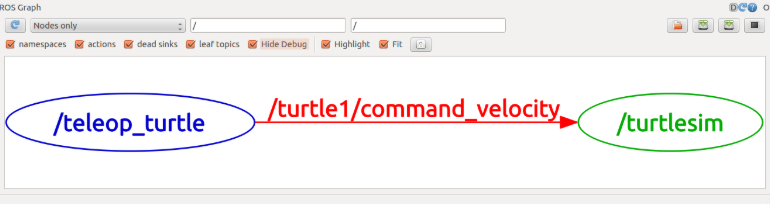

### ROS Messages
话题之间的通信是通过在节点之间发送ROS消息实现的。对于发布器(turtle_teleop_key)和订阅器(turtulesim_node)之间的通信，发布器和订阅器之间必须发送和接收相同类型的消息。这意味着话题的类型是由发布在它上面的消息类型决定的。使用rostopic type命令可以查看发布在某个话题上的消息类型。

rostopic type [topic]

* $ rostopic type /turtle1/cmd_vel
> geometry_msgs/Twist

* $ rosmsg show geometry_msgs/Twist
---------------------------------
* geometry_msgs/Vector3 linear
    *  float64 x
    *  float64 y
    *  float64 z

* geometry_msgs/Vector3 angular
    *  float64 x
    *  float64 y
    *  float64 z

### 使用 rostopic pub
rostopic pub可以把数据发布到当前某个正在广播的话题上。

用法：

rostopic pub [topic] [msg_type] [args]

示例（hydro版)：

* $ rostopic pub -1 /turtle1/cmd_vel geometry_msgs/Twist -- '[2.0, 0.0, 0.0]' '[0.0, 0.0, 1.8]'

以上命令会发送一条消息给turtlesim，告诉它以2.0大小的线速度和1.8大小的角速度开始移动。

* $ rostopic pub /turtle1/cmd_vel geometry_msgs/Twist -r 1 -- '[2.0, 0.0, 0.0]' '[0.0, 0.0, 1.8]'

以上命令以1Hz的频率发布速度命令到速度话题上。

### 使用 rostopic hz 命令查看数据发布的频率

用法：

* rostopic hz [topic]

### rqt_plot命令实时显示一个发布到某个话题上的数据变化图形
使用rqt_plot命令来绘制正在发布到/turtle1/pose话题上的数据变化图形

在一个新终端中运行rqt_plot命令：

* $ rosrun rqt_plot rqt_plot

### ROS Services
服务（services）允许节点发送请求（request） 并获得一个响应（response）

```bash
rosservice list         输出可用服务的信息
rosservice call         调用带参数的服务
rosservice type         输出服务类型
rosservice find         依据类型寻找服务find services by service type
rosservice uri          输出服务的ROSRPC uri
```

### 参数服务器（Parameter Server）

rosparam使得我们能够存储并操作ROS 参数服务器（Parameter Server）上的数据。参数服务器能够存储整型、浮点、布尔、字符串、字典和列表等数据类型。rosparam使用YAML标记语言的语法。一般而言，YAML的表述很自然：1 是整型, 1.0 是浮点型, one是字符串, true是布尔, [1, 2, 3]是整型列表, {a: b, c: d}是字典. rosparam有很多指令可以用来操作参数，如下所示:

```bash
rosparam set            设置参数
rosparam get            获取参数
rosparam load           从文件读取参数
rosparam dump           向文件中写入参数
rosparam delete         删除参数
rosparam list           列出参数名
```

### 调试日志
rqt_console属于ROS日志框架(logging framework)的一部分，用来显示节点的输出信息

rqt_logger_level允许我们修改节点运行时输出信息的日志等级（logger levels）（包括 DEBUG、WARN、INFO和ERROR）。

* $ rosrun rqt_console rqt_console

* $ rosrun rqt_logger_level rqt_logger_level

### roslaunch

roslaunch可以用来启动定义在launch文件中的多个节点

用法：

* $ roslaunch [package] [filename.launch]

**turtlesim2模仿turtlesim1的launch文件**

```xml
<launch>

  <group ns="turtlesim1">
    <node pkg="turtlesim" name="sim" type="turtlesim_node"/>
  </group>

  <group ns="turtlesim2">
    <node pkg="turtlesim" name="sim" type="turtlesim_node"/>
  </group>

  <node pkg="turtlesim" name="mimic" type="mimic">
    <remap from="input" to="turtlesim1/turtle1"/>
    <remap from="output" to="turtlesim2/turtle1"/>
  </node>

</launch>
```

### 消息(msg)
消息(msg): msg文件就是一个描述ROS中所使用消息类型的简单文本，会被用来生成不同语言的源代码

msg文件存放在package的msg目录下

msg文件实际上就是每行声明一个数据类型和变量名。可以使用的数据类型如下：
* int8, int16, int32, int64 (plus uint*)
* float32, float64
* string
* time, duration
* other msg files
* variable-length array[] and fixed-length array[C]

在ROS中有一个特殊的数据类型：**Header**，它含有时间戳和坐标系信息，声明在第一行

下面是一个msg文件的样例，它使用了Header，string，和其他另外两个消息类型：
* Header header
* string child_frame_id
* geometry_msgs/PoseWithCovariance pose
* geometry_msgs/TwistWithCovariance twist

### 服务(srv)

服务(srv): 一个srv文件描述一项服务。它包含两个部分：请求和响应。

srv文件存放在srv目录
srv的一个样例：

```yaml
int64 A
int64 B
---
int64 Sum
```
其中 A 和 B 是请求, 而Sum 是响应。

### [参考实现msg和srv](http://wiki.ros.org/cn/ROS/Tutorials/CreatingMsgAndSrv)

### 录制和回放

```bash
mkdir ~/bagfiles
cd ~/bagfiles
# -a选项表示录制当前发布的所有话题数据，保存在一个时间命名的bag文件中
rosbag record -a
# 录制数据子集
#rosbag record -O subset /turtle1/command_velocity /turtle1/pose
```

检查bag文件的信息
* $ rosbag info <your bagfile>

回放数据

* $ rosbag play <your bagfile>
    
    
    
rosbag record/play 命令的**局限性**

turtle的路径可能并没有完全地映射到原先通过键盘控制时产生的路径上——整体形状应该是差不多的，但没有完全一样。造成该问题的原因是turtlesim的移动路径对系统定时精度的变化非常敏感。rosbag受制于其本身的性能无法完全复制录制时的系统运行行为，rosplay也一样。对于像turtlesim这样的节点，当处理消息的过程中系统定时发生极小变化时也会使其行为发生微妙变化，用户不应该期望能够完美的模仿系统行为。

### 参考
[ROS核心教程](http://wiki.ros.org/cn/ROS/Tutorials)